In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv(r"C:\Users\Maftuna\Desktop\ecommerce_customer_data_custom_ratios.csv")

In [94]:
df.head(5)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [96]:
df.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [97]:
import klib

In [98]:
df = klib.data_cleaning(df)

Shape of cleaned data: (250000, 13) - Remaining NAs: 47596


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 16.45 MB (-66.33%)



In [99]:
unique_classes = df['returns'].unique()
print(unique_classes)

[ 0.  1. nan]


In [100]:
df['returns'].value_counts(dropna=False)

returns
0.0    101635
1.0    100769
NaN     47596
Name: count, dtype: int64

In [101]:
df['returns'] = df['returns'].fillna(0)

In [102]:
df.isnull().sum()

customer_id              0
purchase_date            0
product_category         0
product_price            0
quantity                 0
total_purchase_amount    0
payment_method           0
customer_age             0
returns                  0
customer_name            0
age                      0
gender                   0
churn                    0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   customer_id            250000 non-null  int32   
 1   purchase_date          250000 non-null  string  
 2   product_category       250000 non-null  category
 3   product_price          250000 non-null  int16   
 4   quantity               250000 non-null  int8    
 5   total_purchase_amount  250000 non-null  int16   
 6   payment_method         250000 non-null  category
 7   customer_age           250000 non-null  int8    
 8   returns                250000 non-null  float32 
 9   customer_name          250000 non-null  string  
 10  age                    250000 non-null  int8    
 11  gender                 250000 non-null  category
 12  churn                  250000 non-null  int8    
dtypes: category(3), float32(1), int16(2), int32(1), int8(4), string(2)
memory 

In [104]:
unique_classes = df.nunique()
print(unique_classes)

customer_id               49673
purchase_date            249736
product_category              4
product_price               491
quantity                      5
total_purchase_amount      5247
payment_method                4
customer_age                 53
returns                       2
customer_name             39920
age                          53
gender                        2
churn                         2
dtype: int64


In [105]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['year'] = df['purchase_date'].dt.year
df['month'] = df['purchase_date'].dt.month
df['day'] = df['purchase_date'].dt.day
df['weekday'] = df['purchase_date'].dt.weekday
df.drop('purchase_date', axis=1, inplace=True)


In [106]:
df.drop(['customer_id', 'customer_name'], axis=1, inplace=True)


In [107]:
df.columns

Index(['product_category', 'product_price', 'quantity',
       'total_purchase_amount', 'payment_method', 'customer_age', 'returns',
       'age', 'gender', 'churn', 'year', 'month', 'day', 'weekday'],
      dtype='object')

In [108]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['payment_method'] = le.fit_transform(df['payment_method'])
df['product_category'] = le.fit_transform(df['product_category'])
df['gender'] = le.fit_transform(df['gender'])


In [109]:
df.head(5)

,product_category,product_price,quantity,total_purchase_amount,payment_method,customer_age,returns,age,gender,churn,year,month,day,weekday
0,2,12,3,740,1,37,0.0,37,1,0,2020,9,8,1
1,3,468,4,2739,3,37,0.0,37,1,0,2022,3,5,5
2,3,288,2,3196,3,37,0.0,37,1,0,2022,5,23,0
3,1,196,1,3509,3,37,0.0,37,1,0,2020,11,12,3
4,3,449,1,3452,1,49,0.0,49,0,1,2020,11,27,4


## Mutual Information 

In [110]:
from sklearn.feature_selection import mutual_info_classif

In [111]:
# X va y ni aniqlash
X = df.drop('churn', axis=1)
y = df['churn']

In [113]:
# Mutual Information hisoblanadi
mi = mutual_info_classif(X, y, random_state=42)
mi = pd.Series(mi, index=X.columns).sort_values(ascending=False)

In [114]:
# Jadval ko'rinishida MI qiymatlari
print("Mutual Information qiymatlari:\n", mi)

Mutual Information qiymatlari:
 gender                   0.027327
returns                  0.018027
payment_method           0.011317
product_category         0.008368
quantity                 0.007734
year                     0.007050
weekday                  0.005386
month                    0.004728
customer_age             0.001848
product_price            0.001377
age                      0.001153
total_purchase_amount    0.000000
day                      0.000000
dtype: float64


C:\Users\Maftuna\AppData\Local\Temp\ipykernel_20388\2009215413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi.values, y=mi.index, palette='viridis')


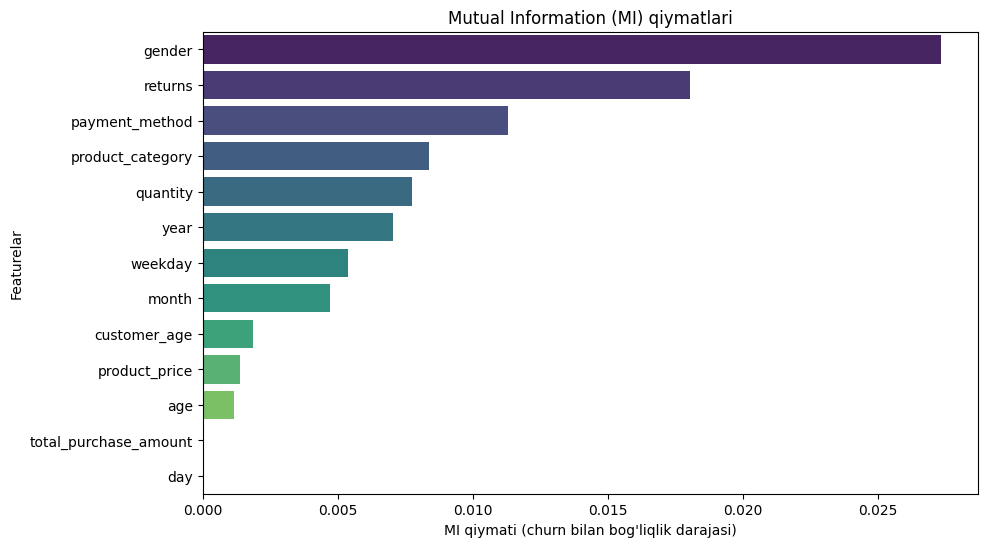

In [115]:

# Graf shaklida MI qiymatlari
plt.figure(figsize=(10, 6))
sns.barplot(x=mi.values, y=mi.index, palette='viridis')

plt.title("Mutual Information (MI) qiymatlari")
plt.xlabel("MI qiymati (churn bilan bog'liqlik darajasi)")
plt.ylabel("Featurelar")
plt.show()